In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import plotly.express as px
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv
/kaggle/input/unsupervised-learning-on-country-data/data-dictionary.csv
/kaggle/input/models/fatihpython/modeldb1/tensorflow2/default/1/eagHybrisSearch.py
/kaggle/input/models/fatihpython/modeldb1/tensorflow2/default/1/dbscan.pkl
/kaggle/input/models/fatihpython/modeldb1/tensorflow2/default/1/remote-work-burnout.ipynb
/kaggle/input/models/fatihpython/modeldb1/tensorflow2/default/1/testf.csv
/kaggle/input/models/fatihpython/modeldb1/tensorflow2/default/1/github2.ipynb
/kaggle/input/models/fatihpython/modeldb1/tensorflow2/default/1/dbscan.ipynb


In [2]:
dataCountry = pd.read_csv('/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv')
dataDict = pd.read_csv('/kaggle/input/unsupervised-learning-on-country-data/data-dictionary.csv')

In [3]:
dataCountry.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
dataCountry.drop(columns=["country"], inplace = True)


In [5]:
dataCountry.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
dataCountry.sum().isnull()

child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

In [7]:
dataCountry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


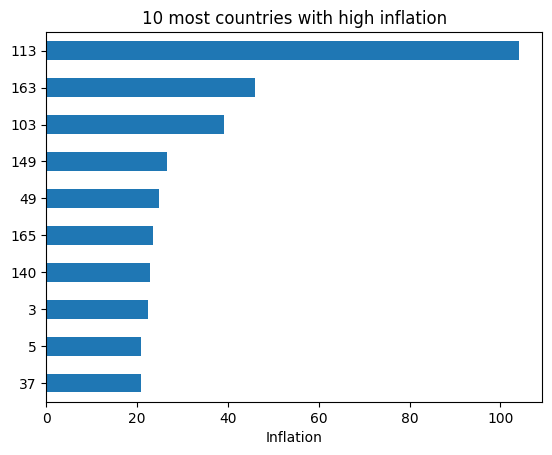

In [8]:
ax = dataCountry["inflation"].sort_values(ascending=False)[:10].plot(kind="barh")
ax.set_xlabel("Inflation")
ax.set_title("10 most countries with high inflation")
ax.invert_yaxis()

Text(0.5, 1.0, 'Heatmap of Corraltion between features')

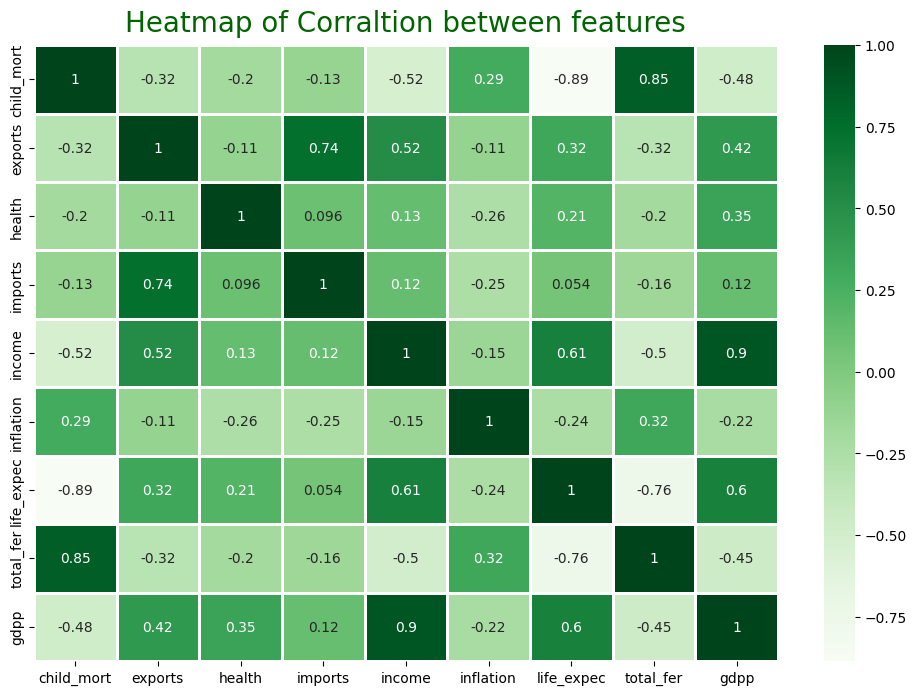

In [9]:
fig , ax = plt.subplots(figsize=(12,8))
sns.heatmap(dataCountry.corr(),
            annot=True,
            cmap="Greens",
            linewidths=1,
            linecolor="white",
            ax = ax
           )
ax.set_title("Heatmap of Corraltion between features",
            pad = 10,
            fontsize=20,
            color = "darkGreen")

In [10]:
df = dataCountry
health_data = np.array(
                        (df['child_mort'] / df['child_mort'].mean()) +
                        (df['health'] / df['health'].mean()) +
                        (df['life_expec'] / df['life_expec'].mean()) +
                        (df['total_fer'] / df['total_fer'].mean())
                      ).reshape(-1,1)

trade_data = np.array(
                        (df['imports'] / df['imports'].mean()) +
                        (df['exports'] / df['exports'].mean())
                      ).reshape(-1,1)

finance = np.array(
                        (df['income'] / df['income'].mean()) +
                        (df['inflation'] / df['inflation'].mean()) +
                        (df['gdpp'] / df['gdpp'].mean())
                    ).reshape(-1,1)

df1 = pd.DataFrame(data = np.concatenate([health_data,trade_data,finance], axis = 1), index = df.index)
df1.columns = ["Health", "Trade", "Finance"]
df1.head()

,Health,Trade,Finance
0,6.239852,1.200812,1.349645
1,3.035901,1.717580,1.471658
2,3.389763,1.603752,3.165367
3,6.469020,2.430387,3.494919
4,2.964898,2.362940,2.240150


In [11]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df1)

In [12]:
data_scaled.shape


(167, 3)

Text(0.5, 1.0, 'K-Means Clustering')

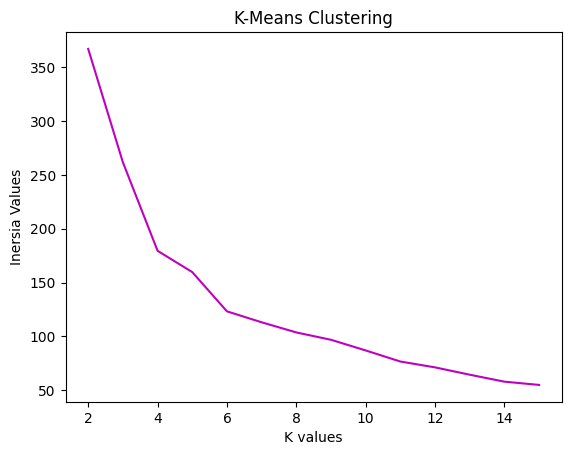

In [13]:
inersia_values = []

for k in np.arange(2,16):
    kmeans = KMeans(n_clusters = k,n_init='auto',random_state = 0).fit(data_scaled)
    inersia_values.append(kmeans.inertia_)


fig , ax = plt.subplots()
ax.plot(np.arange(2,16), inersia_values, color = "m")
ax.set_xlabel("K values")
ax.set_ylabel("Inersia Values")
ax.set_title("K-Means Clustering")

Text(0.5, 1.0, 'Silhouette Analysis for K-Means')

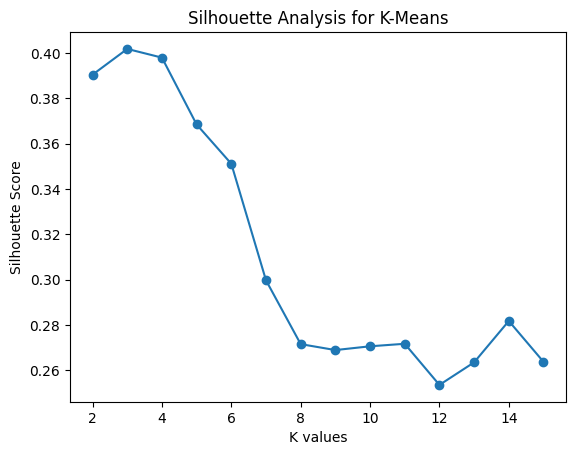

In [14]:
silhouette_values = []

K_range = np.arange(2, 16)

for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        n_init="auto",
        random_state=0
    )
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_values.append(score)

fig, ax = plt.subplots()
ax.plot(K_range, silhouette_values, marker="o")
ax.set_xlabel("K values")
ax.set_ylabel("Silhouette Score")
ax.set_title("Silhouette Analysis for K-Means")

In [15]:
k_means_best = KMeans(n_clusters = 4,
                      n_init='auto',
                      random_state = 0).fit(data_scaled)

labels_kmeans = k_means_best.labels_
labels_kmeans

array([3, 1, 1, 3, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1,
       1, 2, 1, 3, 3, 1, 3, 2, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 2, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 3, 1, 2, 3, 1, 1, 1, 3, 3, 1,
       3, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 3, 3, 2, 1, 1, 1, 1, 3,
       3, 1, 1, 0, 1, 1, 3, 1, 1, 3, 0, 3, 1, 3, 1, 2, 1, 1, 3, 1, 1, 1,
       2, 2, 3, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 3, 1, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 1, 3, 1, 3, 3, 1, 1, 1,
       1, 3, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 3], dtype=int32)

In [16]:
eps_values = np.arange(0.2, 3.0, 0.1)
min_samples_values = range(3, 15)

results = []

for eps in eps_values:
    for min_samples in min_samples_values:

        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_scaled)

        # Ignore cases with only noise or one cluster
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        if n_clusters < 2:
            continue

        score = silhouette_score(
            data_scaled[labels != -1],
            labels[labels != -1]
        )

        results.append({
            "eps": eps,
            "min_samples": min_samples,
            "n_clusters": n_clusters,
            "silhouette": score
        })

results_df = pd.DataFrame(results)
best = results_df.sort_values(
    by="silhouette",
    ascending=False)
best.head()

,eps,min_samples,n_clusters,silhouette
1,0.2,4,4,0.616771
0,0.2,3,5,0.562815
17,0.5,7,2,0.506729
18,0.5,8,2,0.491374
5,0.3,8,2,0.473757


In [17]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming your DataFrame is named dataCountry
X = dataCountry.values   # or dataCountry[['col1','col2',...]].values

# 1️⃣ Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2️⃣ Fit DBSCAN
# eps & min_samples may need tuning!
dbscan = DBSCAN(eps=1.3, min_samples=5)  
labels = dbscan.fit_predict(X_scaled)

# 3️⃣ Add labels to the DataFrame
dataCountry['cluster'] = labels

print(dataCountry.head())
print("\nCluster counts:\n", dataCountry['cluster'].value_counts())


   child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  cluster  
0       5.82    553        0  
1       1.65   4090        1  
2       2.89   4460        1  
3       6.16   3530       -1  
4       2.13  12200        1  

Cluster counts:
 cluster
 1    96
-1    46
 0    25
Name: count, dtype: int64


In [18]:
cluster_summary = dataCountry.groupby("cluster").mean()
print(cluster_summary)


         child_mort    exports    health    imports        income  inflation  \
cluster                                                                        
-1        52.523913  53.839326  6.891739  55.340563  25009.065217  12.880674   
 0        92.604000  23.976400  5.726800  38.448000   1963.440000   8.184200   
 1        17.290625  39.470625  7.062812  45.039583  17329.791667   5.233854   

         life_expec  total_fer          gdpp  
cluster                                       
-1        67.852174   3.370652  18146.021739  
 0        59.420000   5.350000    775.320000  
 1        74.751042   2.119896  13655.354167  


Cluster 0 — “Developing / Middle-Income Countries”
Cluster -1 — OUTLIERS (Unique Profiles)
Cluster 1 — “Developed / High-Income Countries”

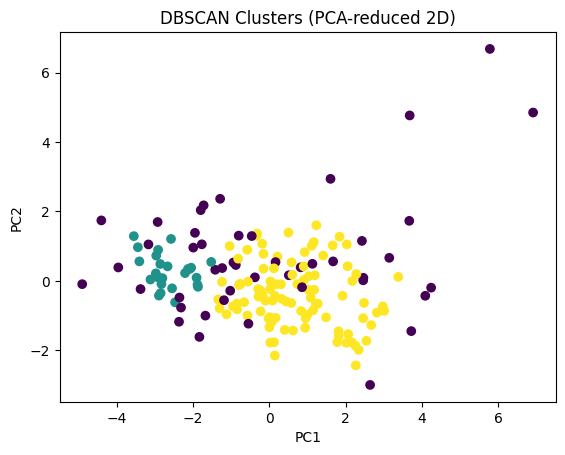

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

X_scaled = StandardScaler().fit_transform(dataCountry.drop("cluster", axis=1))

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

plt.scatter(pca_data[:,0], pca_data[:,1], c=dataCountry["cluster"])
plt.title("DBSCAN Clusters (PCA-reduced 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [20]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

# 👉 Existing data (scaled and with model)
# X_scaled = StandardScaler().fit_transform(dataCountry.drop("cluster", axis=1))
# labels = dataCountry['cluster']

# ---- New country input ----
new_country = np.array([
    [12.5, 30.0, 6.5, 45.0, 12000, 3.1, 78.2, 1.9, 15000]
])

# Scale using the **same scaler**
new_scaled = scaler.transform(new_country)

# Find nearest neighbor in the dataset
nn = NearestNeighbors(n_neighbors=1).fit(X_scaled)
dist, idx = nn.kneighbors(new_scaled)

nearest_index = idx[0][0]
assigned_cluster = dataCountry.iloc[nearest_index]['cluster']

print("Nearest Country Index:", nearest_index)
print("Assigned Cluster:", assigned_cluster)


Nearest Country Index: 1
Assigned Cluster: 1.0


In [21]:
match assigned_cluster:
    case 1:
        print("Cluster 1: Developed / High-Income Country")
    case 0:
        print("Cluster 0: Developing / Middle-Income Country")
    case -1:
        print("Cluster -1: Outlier / Unique Profile")
    case _:
        print("Unknown cluster")


Cluster 1: Developed / High-Income Country


In [22]:
import joblib  
model_path = '/kaggle/working/dbscan.pkl'
joblib.dump(dbscan, model_path)

print(f"Model saved at: {model_path}")

Model saved at: /kaggle/working/dbscan.pkl


In [23]:
import joblib
import os

# List all top-level folders under /kaggle/input/
print(os.listdir('/kaggle/input/models'))

# Replace the path with Kaggle's linked model path
model = joblib.load('/kaggle/input/models/fatihpython/modeldb1/tensorflow2/default/1/dbscan.pkl')

# Example: use your model
preds = model.fit_predict(X)  # for DBSCAN, predict is usually fit_predict


print("DBSCAN Model Parameters:")
print(model.get_params())

if hasattr(model, 'labels_'):
    labels = model.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # ignore noise (-1)
    n_noise = list(labels).count(-1)
    
    print(f"\nNumber of clusters found: {n_clusters}")
    print(f"Number of noise points: {n_noise}")
    print(f"Cluster labels sample: {labels[:20]}")
else:
    print("\nModel not yet fitted. You can fit it on data using model.fit(X)")


['fatihpython']
DBSCAN Model Parameters:
{'algorithm': 'auto', 'eps': 1.3, 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'min_samples': 5, 'n_jobs': None, 'p': None}

Number of clusters found: 0
Number of noise points: 167
Cluster labels sample: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
